# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 4 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn 0.17
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. **You are welcome to split your answer into multiple cells with intermediate printing.**

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions), unless stated otherwise.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [1]:
from __future__ import print_function, division
%matplotlib inline

In [2]:
# Your code goes here
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import KFold, cross_val_predict, cross_val_score

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

/home/tom/miniconda2/envs/iaml/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]


### ========== Question 1.1 ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [23]:
# Your code goes here

print(X.info())
print(X.describe().iloc[:,0:5])
print(X.head(5))
print(np.unique(y))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Columns: 1000 entries, abc to zone
dtypes: float64(1000)
memory usage: 21.7 MB
None
               abc      ability         able           ac       accept
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000
mean      0.002436     0.002149     0.006709     0.001454     0.002286
std       0.030224     0.020739     0.034631     0.023100     0.021634
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000     0.000000
max       0.723914     0.420916     0.431380     0.519765     0.443354
   abc  ability  able   ac  accept  access  according  acquired  actually  \
0  0.0      0.0   0.0  0.0     0.0     0.0        0.0       0.0       0.0   
1  0.0      0.0   0.0  0.0     0.0     0.0       

*Your answer goes here*

Each row in X contains the data of the words that appears in the document. y contains the target label of the documents.

### ========== Question 1.2 ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [5]:
# Your code goes here

kmeans = KMeans(n_clusters = 5, random_state = 1234)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

### ========== Question 1.3 ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [6]:
# Your code goes here
data_mean = X.mean(axis=0)
mean_distances = np.sqrt(((X-data_mean)**2).sum(axis=1)).mean(axis=0)
print("The mean of the euclidean distances is: {0}".format(mean_distances))

print("The inertia of the model is: {0}".format(kmeans.inertia_))

ars = adjusted_rand_score(y_num,kmeans.labels_)
print("The adjusted rand index of the model is: {0}".format(ars))

The mean of the euclidean distances is: 0.954584949852
The inertia of the model is: 2593.34638596
The adjusted rand index of the model is: 0.22918550819


*Your answer goes here*

Inertia repersents the sum of distances of samples to their closest cluster center.

The ARI is computed like this:
ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
It measures the similarity between two clusterings by comsidering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

From the adjusted_rand_score, we could see that this model perform not very well.Because it is close to 0, which means the clusterings are not identical.

### ========== Question 1.4 ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [7]:
# Your code goes here

for it in range(len(cats)):
    print("The number of datapoints for {0} is: {1}".format(cats[it],y_num[y_num==it].shape[0]))
    print("The number of datapoints assigned to {0} is: {1}\n".format(cats[it],kmeans.labels_[kmeans.labels_==it].shape[0]))

The number of datapoints for alt.atheism is: 480
The number of datapoints assigned to alt.atheism is: 674

The number of datapoints for comp.sys.ibm.pc.hardware is: 590
The number of datapoints assigned to comp.sys.ibm.pc.hardware is: 547

The number of datapoints for comp.sys.mac.hardware is: 578
The number of datapoints assigned to comp.sys.mac.hardware is: 230

The number of datapoints for rec.sport.baseball is: 597
The number of datapoints assigned to rec.sport.baseball is: 1014

The number of datapoints for rec.sport.hockey is: 600
The number of datapoints assigned to rec.sport.hockey is: 380



*Your answer goes here*

From above data, most data points are assigned to rec.sport.baseball though the distribution of the data points should be average to each label. Therefore, the performance of the model is not good.

### ========== Question 1.5 ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [8]:
# Your code goes here
dis_matrix = np.zeros((5,5))

for i in range(kmeans.cluster_centers_.shape[0]):
    for j in range(kmeans.cluster_centers_.shape[0]):
        dis_matrix[i,j] = np.sqrt(((kmeans.cluster_centers_[i]-kmeans.cluster_centers_[j])**2).sum())
print(dis_matrix)


[[ 0.          0.29293111  0.39738686  0.20288368  0.27425246]
 [ 0.29293111  0.          0.32398681  0.19602292  0.28508004]
 [ 0.39738686  0.32398681  0.          0.33049792  0.39392661]
 [ 0.20288368  0.19602292  0.33049792  0.          0.21848633]
 [ 0.27425246  0.28508004  0.39392661  0.21848633  0.        ]]


### ========== Question 1.6 ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

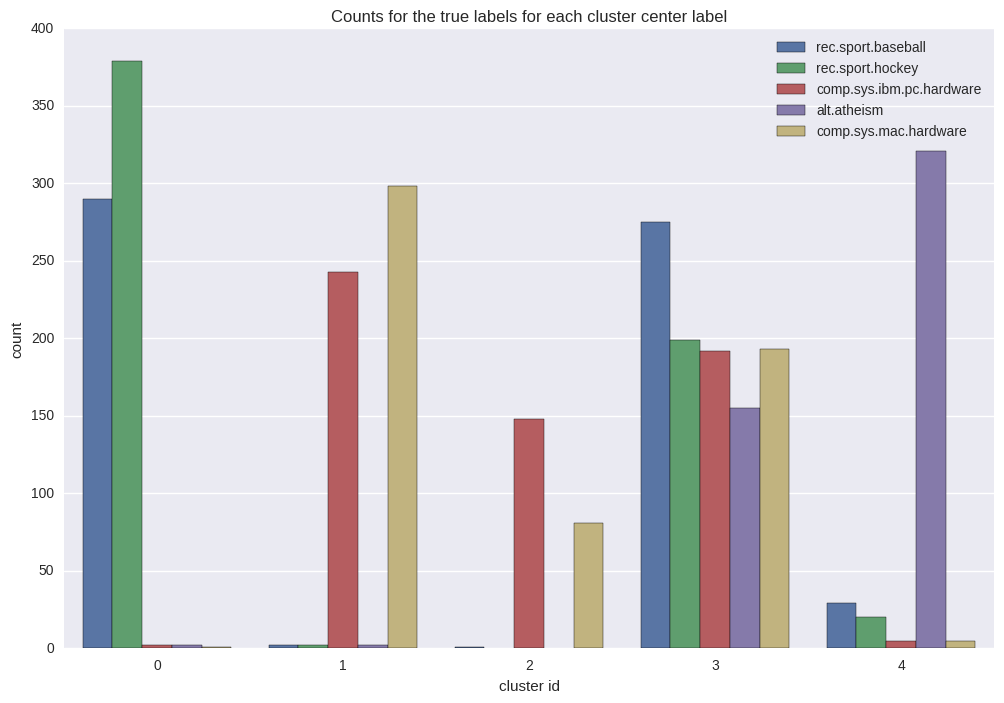

In [9]:
# Your code goes here
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
plt.xlabel('cluster id')
plt.title('Counts for the true labels for each cluster center label')
plt.show()

*Your answers goes here*

From the plot, there are only one cluster that contain one main type of datapoint(label 4). The clustering on other labels is not inefficient.
Focussing on the clusters, we could say that the cluster works well on label 4, and it woroks very bad on label 3. Also, the alt.atheism and rec.sport.hockey is very identical so that they are well clustered by the model and the other labels are hard to determined by the cluster because they are assigned to many different groups.

### ========== Question 1.7 ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

The inertia of the model witn 1 reduced datasets is: 2.82136329165
The adjust random score of the model witn 1 reduced datasets is: 0.209652569094

The inertia of the model witn 2 reduced datasets is: 10.5841220156
The adjust random score of the model witn 2 reduced datasets is: 0.267599183417

The inertia of the model witn 3 reduced datasets is: 20.4281622919
The adjust random score of the model witn 3 reduced datasets is: 0.24296770552

The inertia of the model witn 5 reduced datasets is: 49.8136888545
The adjust random score of the model witn 5 reduced datasets is: 0.223096777916

The inertia of the model witn 10 reduced datasets is: 117.91767318
The adjust random score of the model witn 10 reduced datasets is: 0.217117161178

The inertia of the model witn 20 reduced datasets is: 231.238989237
The adjust random score of the model witn 20 reduced datasets is: 0.184157687914

The inertia of the model witn 50 reduced datasets is: 488.68535633
The adjust random score of the model witn 5

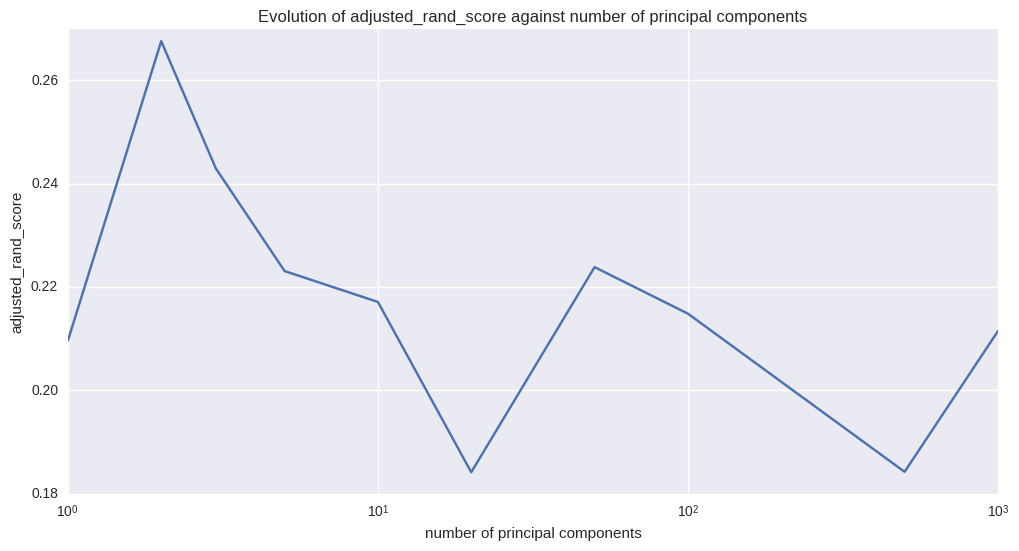

In [10]:
# Your code goes here
datasets_n = [1,2,3,5,10,20,50,100,500,1000]
pca17={}
ars17=[]
inertia17=[]
for it in range(len(datasets_n)):
    pca17[datasets_n[it]] = KMeans(n_clusters = 5, random_state = 1234).fit(
        PCA(n_components=datasets_n[it],random_state=1234).fit_transform(X))
    ars17.append(adjusted_rand_score(y_num,pca17[datasets_n[it]].labels_))
    inertia17.append(pca17[datasets_n[it]].inertia_)
    print('The inertia of the model witn {0} reduced datasets is: {1}'.format(
        datasets_n[it],inertia17[it]))
    print('The adjust random score of the model witn {0} reduced datasets is: {1}\n'.format(
        datasets_n[it],ars17[it]))

plt.figure(figsize=(12,6))
plt.plot(datasets_n, ars17)
plt.xlabel('number of principal components')
plt.xscale('log')
plt.ylabel('adjusted_rand_score')
plt.title('Evolution of adjusted_rand_score against number of principal components')
plt.show()

*Your answer goes here*

This plot shows the evolution of the adjusted_rand_score against the number of pricipal components. 

The reason I think why we cannot use inertia to choose the best number of principal components is that the distance between the datapoints and closest cluster center could not judge the performance of the clustering in some case. For example, the distance could be influenced by the number of cluster centers.

K-means cluster is depend on the distance of each datapoints. As shown in the plot, the performance of 2 dimension dataset is the best. I think the reason is that in 2-D space, the k-means algorithm could work better (easy to estimate the distance) so that it performs well.


### ========== Question 1.8 ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

The adjust rand score of the new k-means model is:0.267599183417


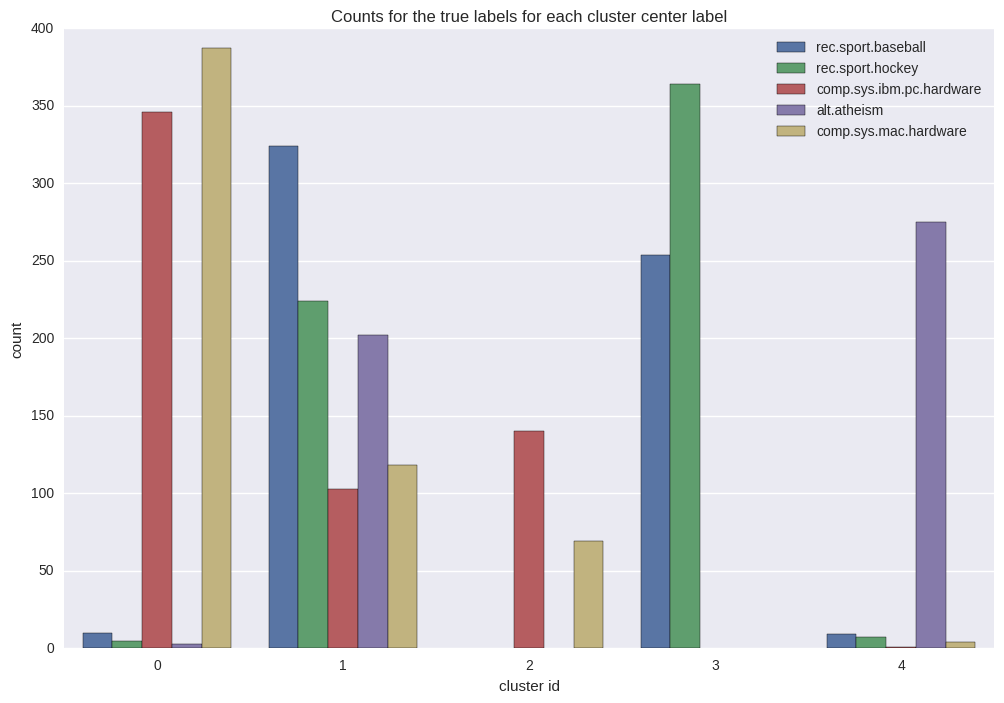

In [11]:
# Your code goes here
X_2d = PCA(n_components=2, random_state=1234).fit_transform(X)
kmeans_pca = KMeans(n_clusters = 5, random_state = 1234)
kmeans_pca.fit(X_2d)
print('The adjust rand score of the new k-means model is:{0}'.format(
    adjusted_rand_score(y_num,kmeans_pca.labels_)))

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=kmeans_pca.labels_, hue=y, ax=ax)
plt.xlabel('cluster id')
plt.title('Counts for the true labels for each cluster center label')
plt.show()



*Your answer goes here*

Yes. The cluster in this question is better than the cluster on 1000 dimensional dataset as the plot show the cluster results is more identical(see class 1 and class 4 in this plot, the data is mainly centered around these labels) and the score is also higher.

### ========== Question 1.9 ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

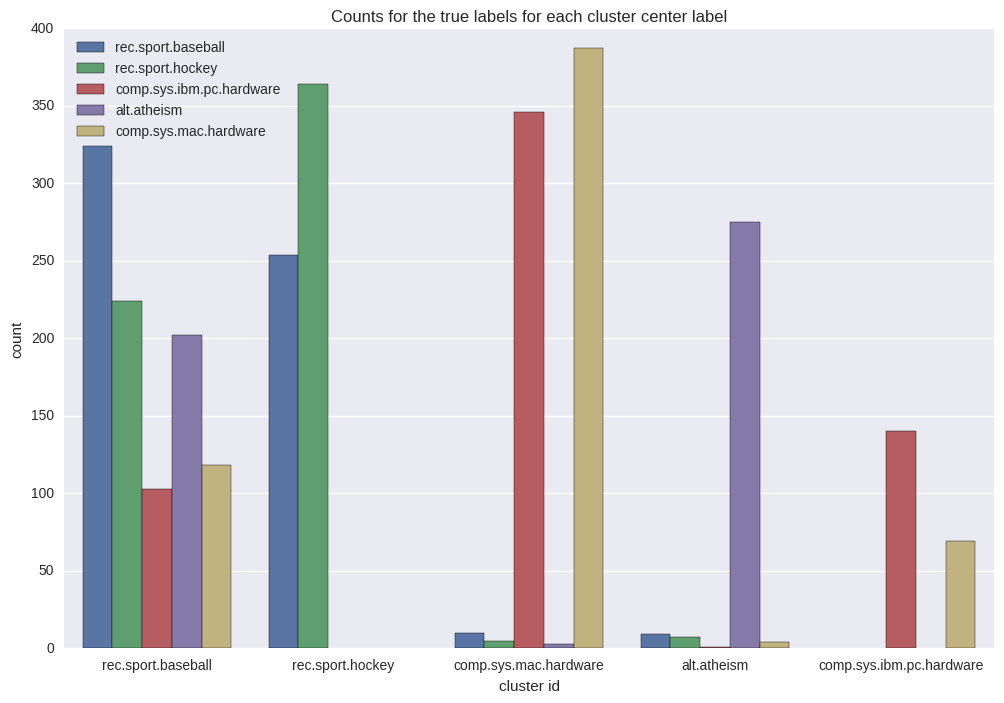

In [12]:
# Your code goes here

cats19 = ['comp.sys.mac.hardware','rec.sport.baseball',
          'comp.sys.ibm.pc.hardware','rec.sport.hockey','alt.atheism']
labels_interp = np.array(cats19)[kmeans_pca.labels_]

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=labels_interp, hue=y, ax=ax)
plt.xlabel('cluster id')
plt.title('Counts for the true labels for each cluster center label')
plt.show()

### ========== Question 1.10 ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

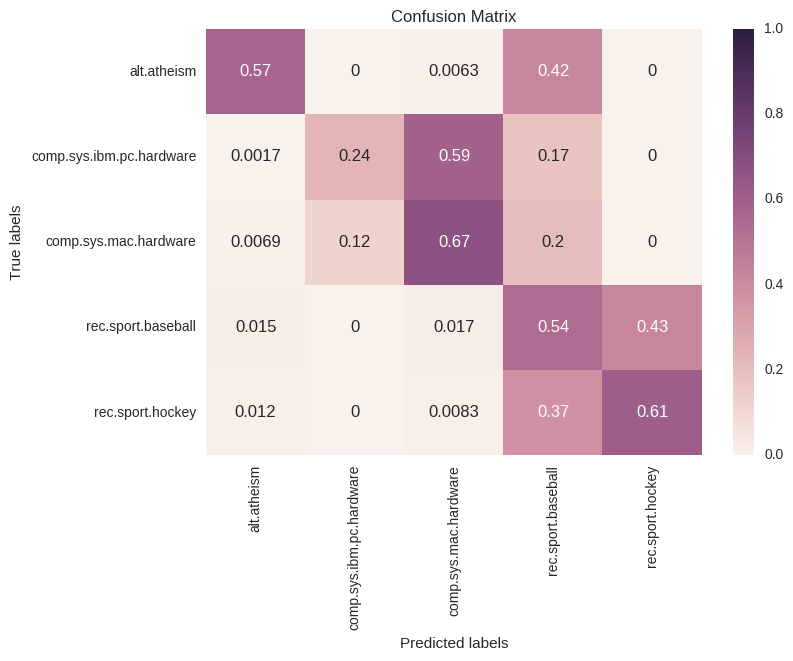

In [13]:
# Your code goes here

cm110 = confusion_matrix(y,labels_interp)
cm_110_nor = cm110/cm110.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_110_nor, xticklabels=cats,yticklabels=cats,vmin=0., vmax=1., annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

### ========== Question 1.11 ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

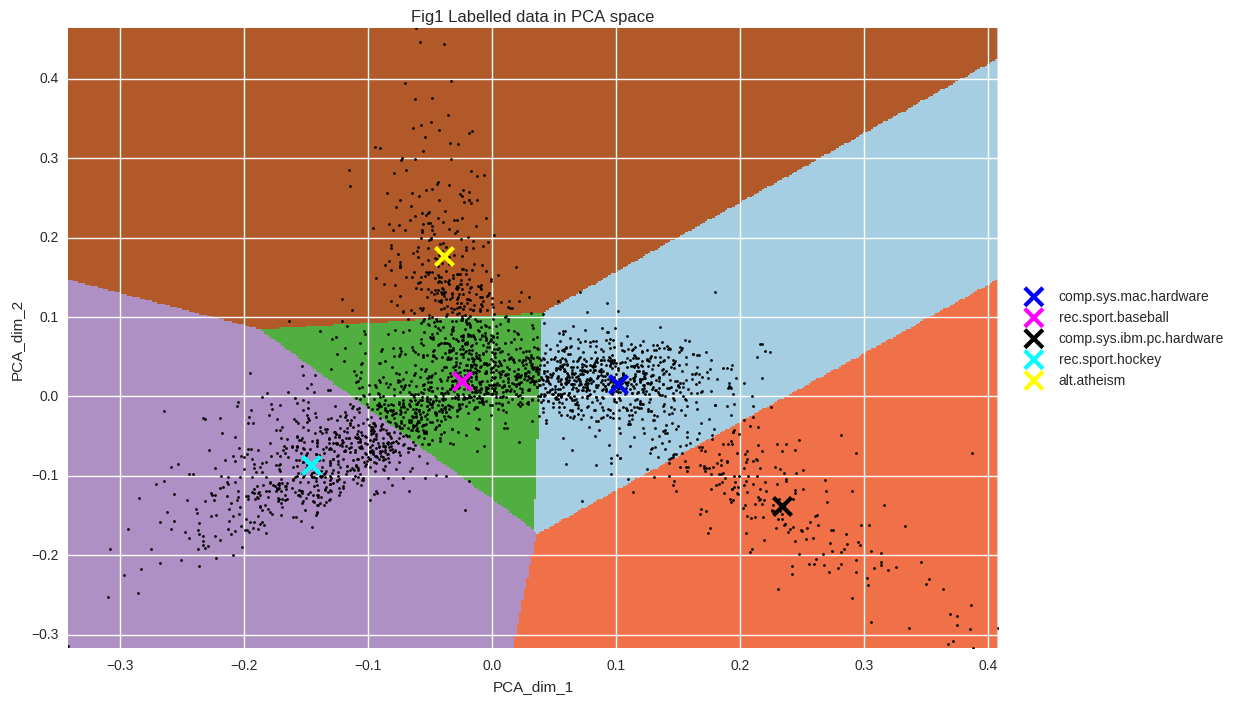

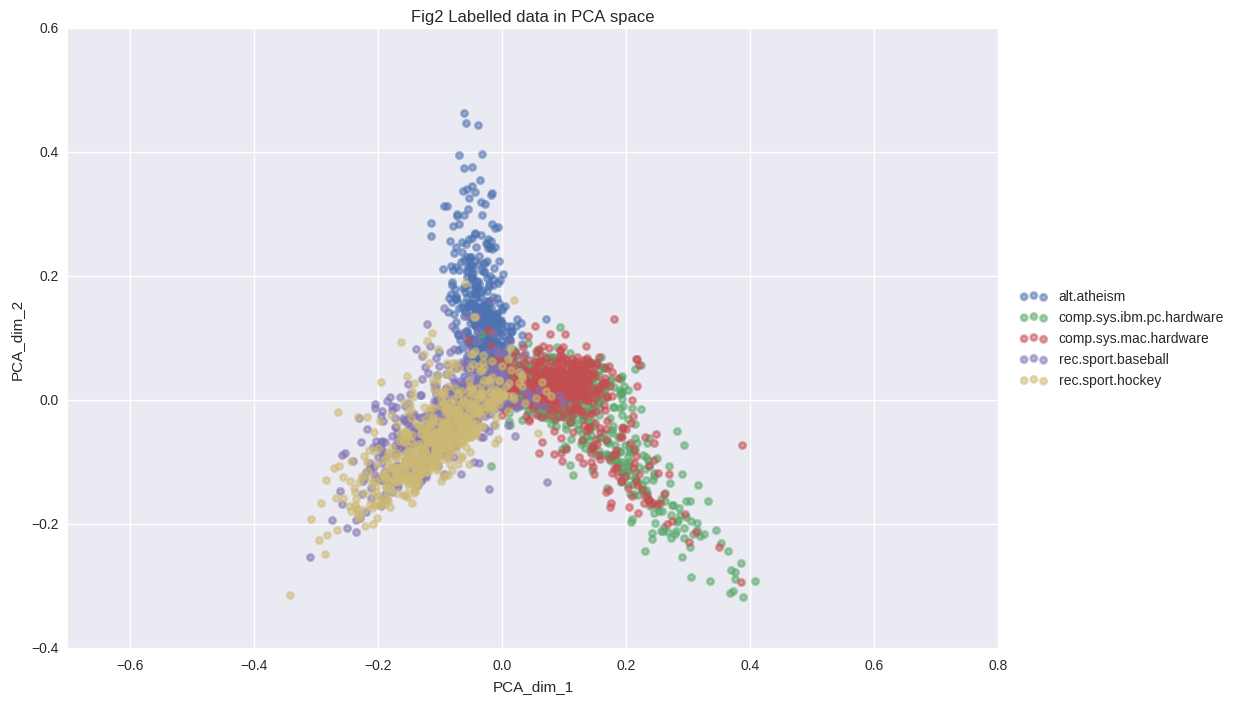

In [14]:
# Your code goes here

h=.002
x_min, x_max = X_2d[:, 0].min(), X_2d[:, 0].max()
y_min, y_max = X_2d[:, 1].min(), X_2d[:, 1].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(Z,interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto',origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=4)
centroids = kmeans_pca.cluster_centers_
centrocolor=['blue', 'magenta', 'black','cyan','yellow']

for it in range(centroids.shape[0]):
    plt.scatter(centroids[it,0], centroids[it,1],
            marker='x', s=169, linewidths=3,
            color=centrocolor[it], zorder=10,
            label=cats19[it])
plt.legend(loc='center left', scatterpoints=1, bbox_to_anchor=[1.01, 0.5])
plt.title('Fig1 Labelled data in PCA space')
plt.xlabel('PCA_dim_1')
plt.ylabel('PCA_dim_2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


plt.figure(figsize=(12,8))
lw = 2
colours = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']
for color, target_name in zip(colours, cats):
    plt.scatter(X_2d[y == target_name, 0], X_2d[y == target_name, 1], color=color, alpha=.5, lw=lw,
                label=target_name)
plt.axis('equal')
plt.legend(loc='center left', scatterpoints=3, bbox_to_anchor=[1.01, 0.5])
plt.title('Fig2 Labelled data in PCA space')
plt.xlabel('PCA_dim_1')
plt.ylabel('PCA_dim_2')
top_plot = plt.gca()
plt.show()


### ========== Question 1.12  ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

*Your answer goes here*

1.Not always I think. Just as shown above, I think Kmeans could work well if the data itself is identical enough. Of course, in the case of slur classes boundary, kmeans algorithm is not deterministic. 

2.The algorithm in Question1.2 did 10 times to do the initialisation. It used 'kmeans++' to do the initialisation (shown in the information of that cluster) and choose the best result from 10 times running in terms of inertia.

3.Another method for initialising could be giving a group of random point. This method is easy to achieve but if the choosing points are inappropriate, the model may spend long time on training. Even worse, the model may not converge in some special cases.

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. Print the max/min values for each dimension
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

     dim1  dim2  dim3  dim4  dim5  dim6  dim7  dim8  dim9  dim10  ...    \
min   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...     
max   0.0   8.0  16.0  16.0  16.0  16.0  16.0  15.0   2.0   16.0  ...     

     dim55  dim56  dim57  dim58  dim59  dim60  dim61  dim62  dim63  dim64  
min    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
max   16.0   13.0    1.0    9.0   16.0   16.0   16.0   16.0   16.0   16.0  

[2 rows x 64 columns]


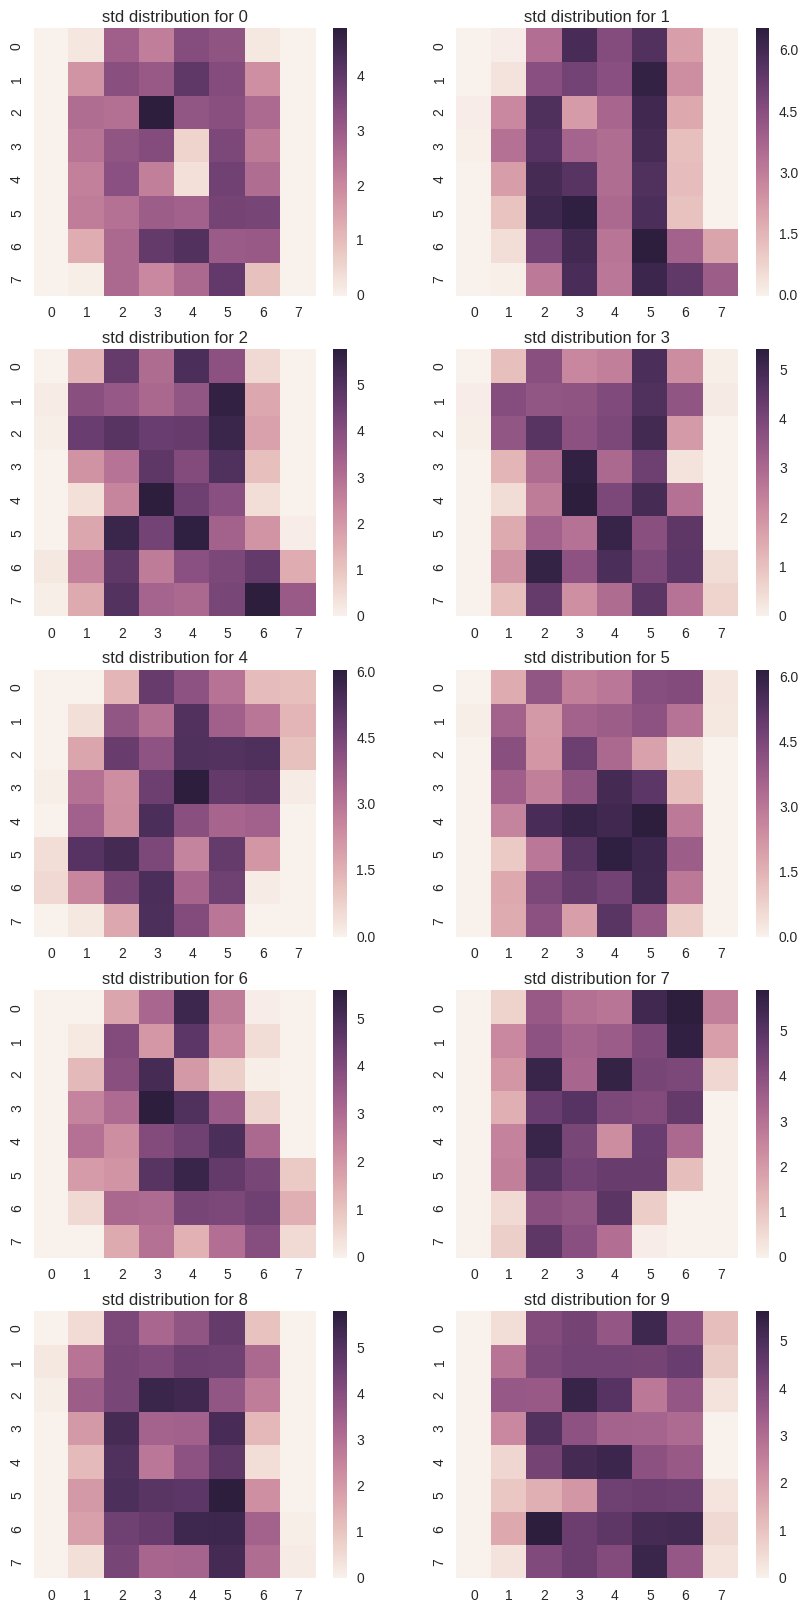

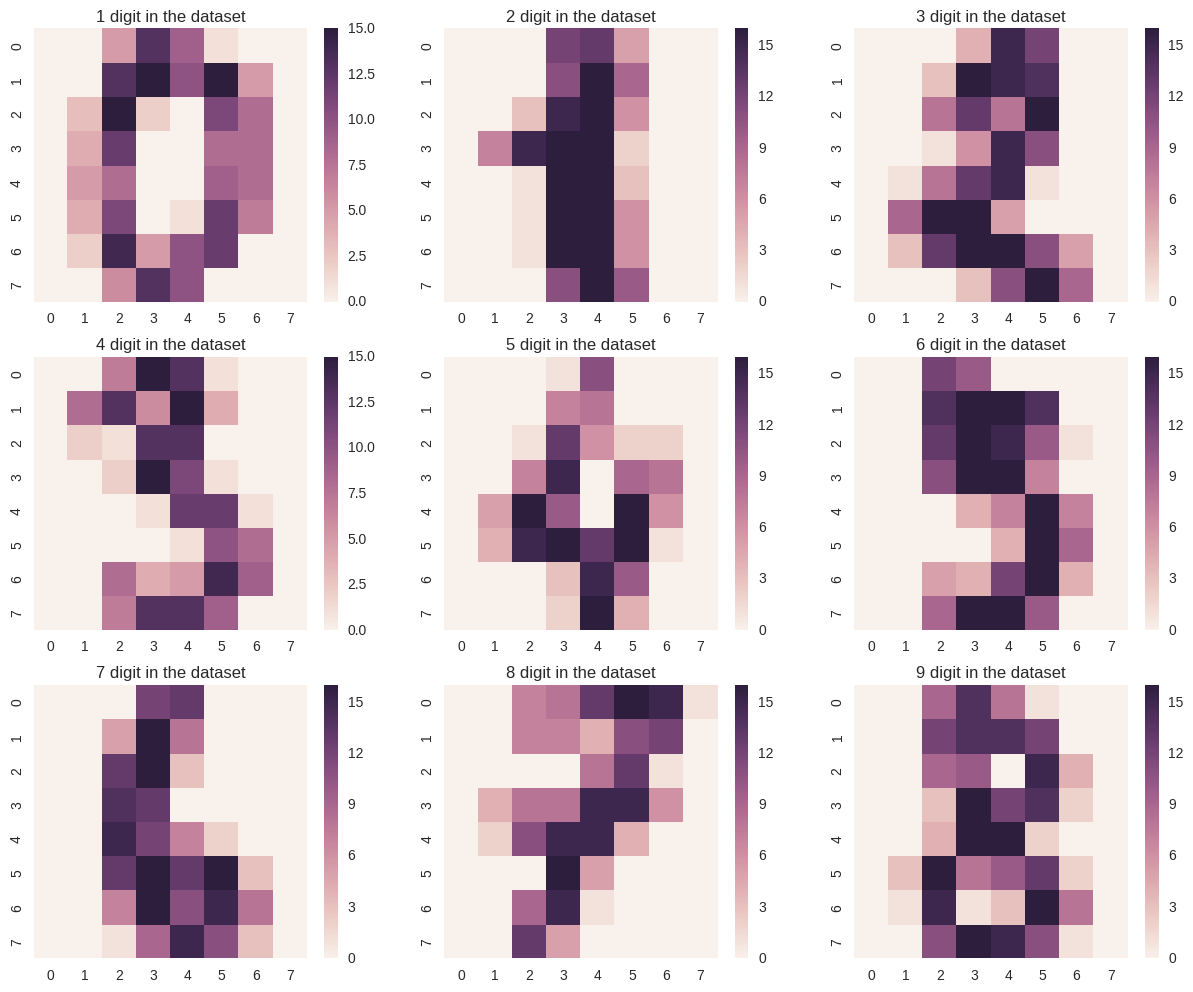

In [16]:
# Your code goes here
digits.keys()
#pd.DataFrame({'target':digits.target}).describe()
#pd.DataFrame({'data':digits.data}).describe()
#print(type(digits.data))
digitdata = pd.DataFrame()
for it in range(digits.data.shape[1]):
    digitdata['dim'+str(it+1)] = digits.data[:,it]
print(digitdata.describe().iloc[[3,7],:])

digit_std = []
fig_1 = plt.figure(figsize=(10,20))
count = 1
for it in digitdata.groupby(digits.target):
    digit_std = it[1].describe().iloc[2,:].reshape((8,8))
    ax = fig_1.add_subplot(5,2,count)
    sns.heatmap(digit_std)
    ax.set_title("std distribution for "+str(count-1))
    count += 1


fig_2 = plt.figure(figsize=(15,12))
for it in range(9):
    ax = fig_2.add_subplot(3,3,it+1)
    sns.heatmap(digits.images[it])
    ax.set_title(str(it+1)+' digit in the dataset')

plt.show()

*Your answer goes here*

Absolutely not. As we could see in the plots, the points in the boundary(especially in the left side and right side) are always white(0) for each digit. So, the points near the boundary is useless for clustering. By contrast, the points in central area are useful as they contain more information of the digits.

### ========== Question 2.2 ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

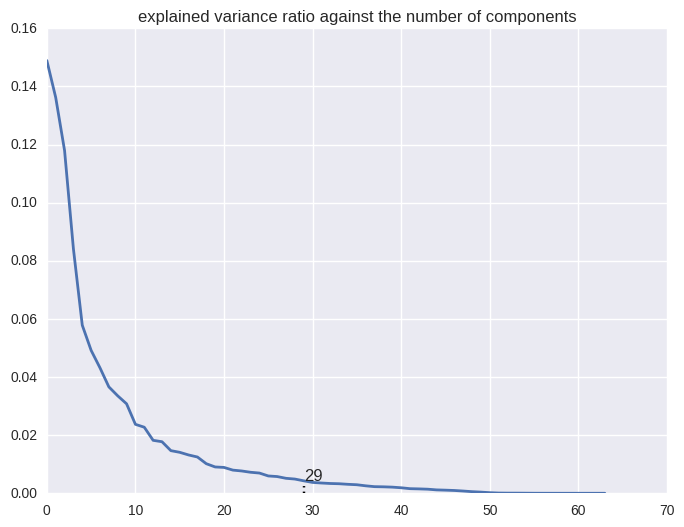

In [17]:
# Your code goes here
pca22 = PCA(n_components=digits.data.shape[1],random_state=1234)
pca22.fit(digits.data)

plt.figure(figsize=(8,6))
plt.plot(pca22.explained_variance_ratio_,linewidth=2)
plt.title('explained variance ratio against the number of components')

sum = 0
ite = 0
for it in range(len(pca22.explained_variance_ratio_)):
    sum += pca22.explained_variance_ratio_[it]
    if sum >= 0.95:
        ite = it
        break
ite += 1
plt.vlines(ite,[0],pca22.explained_variance_ratio_[ite],linestyles='dotted')
plt.annotate(str(ite),(ite,pca22.explained_variance_ratio_[ite]))
plt.show()

*Your answer goes here*

With the increase of the number of components, the cariance ratio reduces and it becomes extremly small after 40th variance ratio. I think this means we do not need to make the whole use of the components. Some of components could already provide a considerable good result.

### ========== Question 2.3 ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

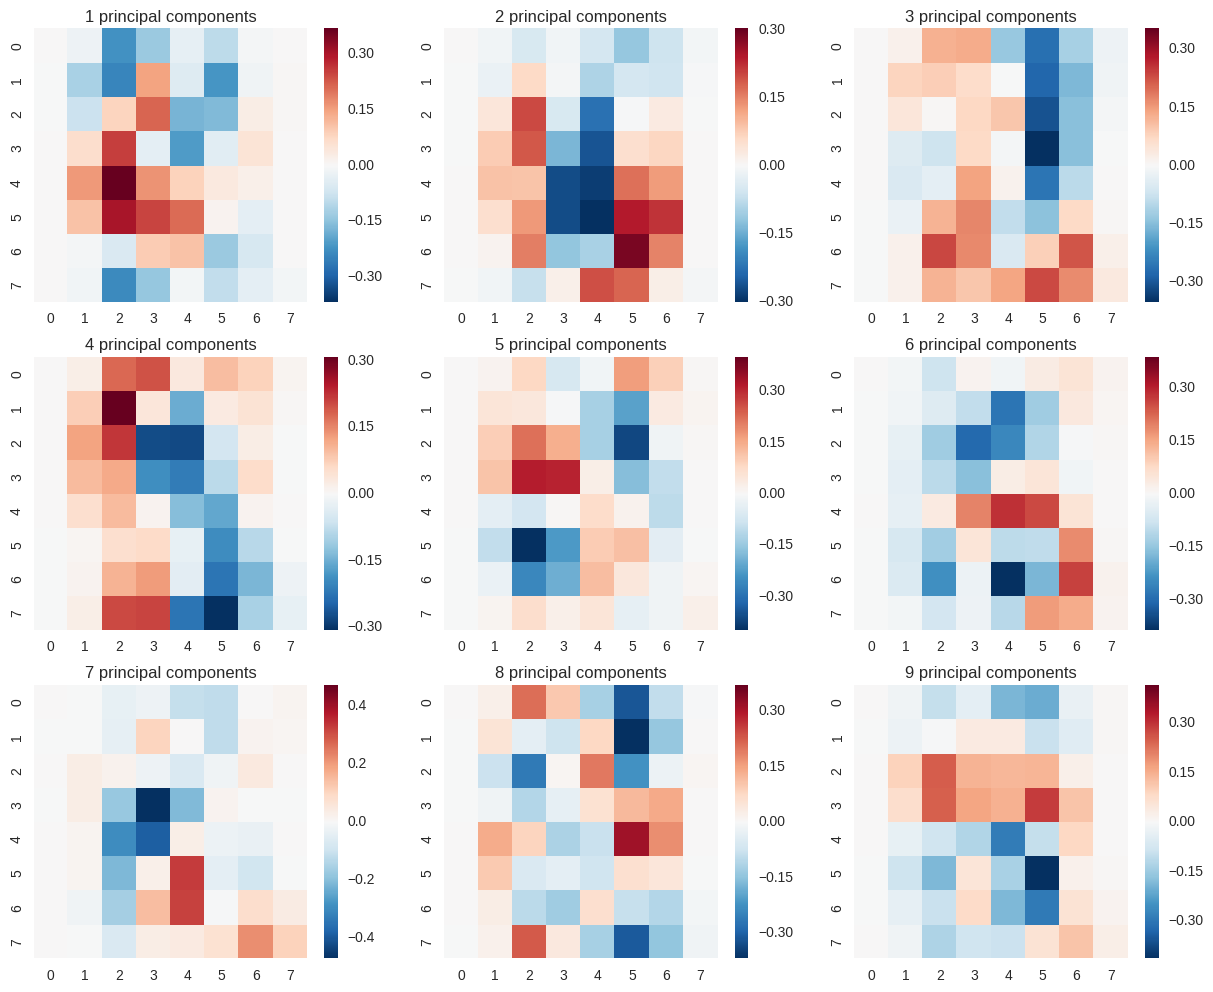

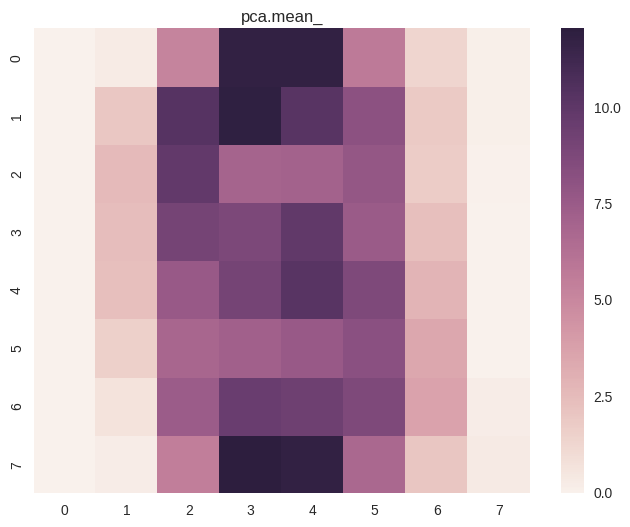

In [18]:
# Your code goes here

fig = plt.figure(figsize=(15,12))
for it in range(9):
    ax = fig.add_subplot(3,3,it+1)
    sns.heatmap(pca22.components_[it].reshape((8,8)))
    ax.set_title(str(it+1)+' principal components')

fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(pca22.mean_.reshape((8,8)))
ax.set_title('pca.mean_')
plt.show()


### ========== Question 2.4 ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

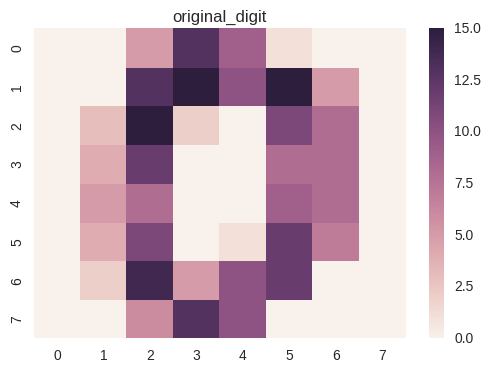

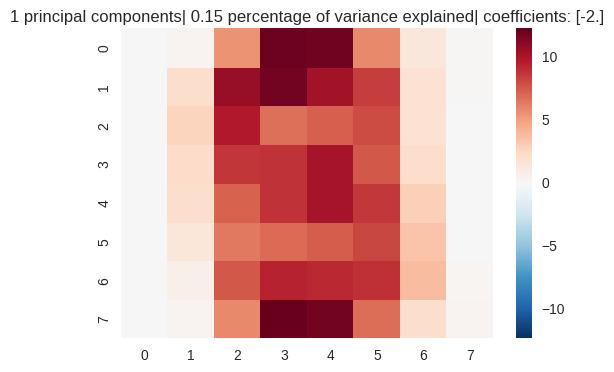

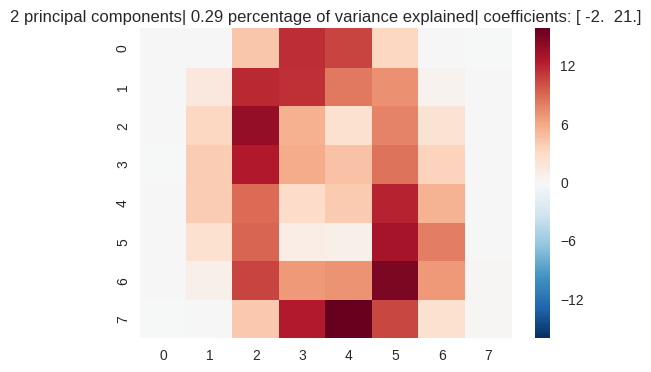

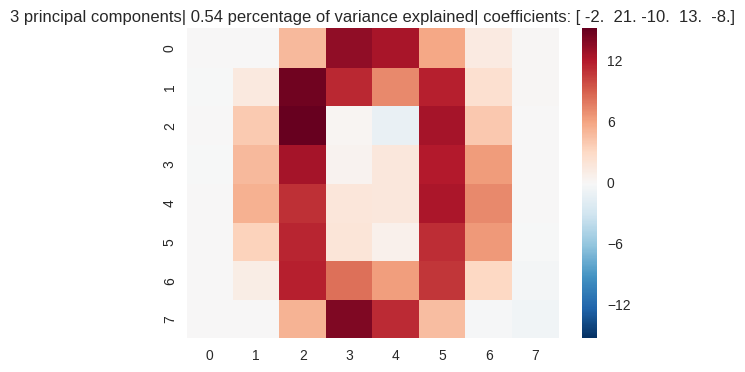

In [33]:
# Your code goes here

idx=0

plt.figure(figsize=(6,4))
ax0 = sns.heatmap(digits.data[0,:].reshape((8,8)))
ax0.set_title('original_digit')

plt.figure(figsize=(6,4))
pca241 = PCA(n_components=1,random_state=1234)
pca241.fit(digits.data)
trans_data_1 = pca241.transform(digits.data[idx,:].reshape(1, -1)).flatten()
td1 = trans_data_1.dot(pca241.components_) + pca241.mean_
ax1 = sns.heatmap(td1.reshape((8,8)))
sum_1 = 0
for it in pca241.explained_variance_ratio_: sum_1 += it  
ax1.set_title('{0} principal components| {1:.2f} percentage of variance explained| coefficients: {2}'.format(
    1,sum_1,trans_data_1//1))


plt.figure(figsize=(6,4))
pca242 = PCA(n_components=2,random_state=1234)
pca242.fit(digits.data)
trans_data_2 = pca242.transform(digits.data[idx,:].reshape(1, -1)).flatten()
td2 = trans_data_2.dot(pca242.components_) + pca242.mean_
ax2 = sns.heatmap(td2.reshape((8,8)))
sum_2 = 0
for it in pca242.explained_variance_ratio_: sum_2 += it  
ax2.set_title('{0} principal components| {1:.2f} percentage of variance explained| coefficients: {2}'.format(
    2,sum_2,trans_data_2//1))


plt.figure(figsize=(6,4))
pca243 = PCA(n_components=5,random_state=1234)
pca243.fit(digits.data)
trans_data_3 = pca243.transform(digits.data[idx,:].reshape(1, -1)).flatten()
td3 = trans_data_3.dot(pca243.components_) + pca243.mean_
ax3 = sns.heatmap(td3.reshape((8,8)))
sum_3 = 0
for it in pca243.explained_variance_ratio_: sum_3 += it  
ax3.set_title('{0} principal components| {1:.2f} percentage of variance explained| coefficients: {2}'.format(
    3,sum_3,trans_data_3//1))

plt.show()

*Your answer goes here*

Yes, the result is amazing. From the evolution of the plot, we could clearly see a 0 appears in the plots generally. I think it's the eigenvectors help to explain the data.

### ========== Question 2.5 ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved but the other did not!

In [31]:
# Your code goes here

kf25 = KFold(digits.data.shape[0],n_folds=5,shuffle=True,random_state=1234)

svc251 = SVC(kernel='linear',random_state=1234)
svc251_sc = cross_val_score(svc251,digits.data,digits.target,cv=kf25)
print('Mean score for SVC on original data: {0:.4f}'.format(svc251_sc.mean()))

svc252 = SVC(kernel='linear',random_state=1234)
svc252_sc = cross_val_score(svc252,pca22.transform(digits.data),digits.target,cv=kf25)
print('Mean score for SVC on transformed data: {0:.4f}'.format(svc252_sc.mean()))

gnb251 = GaussianNB()
gnb251_sc = cross_val_score(gnb251,digits.data,digits.target,cv=kf25)
print('Mean score for GNB on original data: {0:.4f}'.format(gnb251_sc.mean()))

gnb252 = GaussianNB()
gnb252_sc = cross_val_score(gnb252,pca22.transform(digits.data),digits.target,cv=kf25)
print('Mean score for GNB on transformed data: {0:.4f}'.format(gnb252_sc.mean()))



Mean score for SVC on original data: 0.9811
Mean score for SVC on transformed data: 0.9811
Mean score for GNB on original data: 0.8403
Mean score for GNB on transformed data: 0.8887


*Your answer goes here*

From the results, the performance of Gaussian Naive Bayes Classifier improved with PCA, but the SVC didn't. The reason is that pca is a 64 component pca and the data also has 64 dimensions. So, the relative position of each point in dataset doesn't change. Since the SVC classifier is also based on the distance to each datapoint to determin the hyperplane, the results of SVC on original and transformed data are the same. As for the Gaussian Naive Bayes, this model classfies the data based on the probablities of each point(dimension). Pca in this case makes every dimension contain more information(instead of 0 in many dimension in original data) so that the model performance gets improved.